<a href="https://colab.research.google.com/github/akshaygrao77/DeepLearning-Assignment3/blob/main/Question_4_creative_outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb
!pip install wordcloud
!pip install colour

     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 144 kB 67.1 MB/s 
     |████████████████████████████████| 181 kB 65.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=71555a2dc98f667846619ae419cc94e733fcf4bd9d51029ce6cd9e5b3fe1110f
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [2]:
## Installing font for Hindi for matplotlib ##
!apt-get install -y fonts-lohit-deva
!fc-list :lang=kn family

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-lohit-deva
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 78.2 kB of archives.
After this operation, 196 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-lohit-deva all 2.95.4-2 [78.2 kB]
Fetched 78.2 kB in 0s (599 kB/s)
Selecting previously unselected package fonts-lohit-deva.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../fonts-lohit-deva_2.95.4-2_all.deb ...
Unpacking fonts-lohit-deva (2.95.4-2) ...
Setting up fonts-lohit-deva (2.95.4-2) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
import os
import random
import time
import wandb
import re, string
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from colour import Color
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
## Download the dataset ##
import requests
import tarfile

def download_data(save_path):

    data_url = r"https://storage.googleapis.com/gresearch/dakshina/dakshina_dataset_v1.0.tar"

    r = requests.get(data_url, allow_redirects=True)
    tar_path = "data_assignment3.tar"

    if r.status_code == 200:
        with open(tar_path, 'wb') as f:
            f.write(r.content)

    tar_file = tarfile.open(tar_path)
    tar_file.extractall(save_path)
    tar_file.close()


# downloading and extracting the data to drive 
# uncomment the line below if downloading data for the 1st time
# download_data("/content/drive/MyDrive/DakshinaDataset")

In [7]:
# Files with English to Devanagari (Hindi) translation word by word 
# Punctutations have already been cleaned from this file 

def get_data_files(language):
    """ Function fo read data 
    """

    ## REPLACE THIS PATH UPTO dakshina_dataset_v1.0 with your own dataset path ##
    template = "/content/drive/MyDrive/DakshinaDataset/dakshina_dataset_v1.0/{}/lexicons/{}.translit.sampled.{}.tsv"

    train_tsv = template.format(language, language, "train")
    val_tsv = template.format(language, language, "dev")
    test_tsv = template.format(language, language, "test")

    return train_tsv, val_tsv, test_tsv


In [9]:
from google.colab import files
 
 
uploaded = files.upload()

Saving predictions_withoutattention.csv to predictions_withoutattention.csv


In [33]:
import io
 
predictions = pd.read_csv(io.BytesIO(uploaded['predictions_withoutattention.csv']))


In [34]:
 predictions=predictions["outputs"]

In [85]:
#uploaded = files.upload()
font_path="Lohit Kannada Regular.ttf"


In [107]:
df = pd.read_csv(get_data_files("kn")[2], sep="\t", header=None)
inputs = df[1].iloc[2150:2170].astype(str).tolist()
targets = df[0].iloc[2150:2170].astype(str).tolist()
prediction=predictions.iloc[2150:2170]
preds = list(prediction)
print(inputs)
print(preds)

['nildaanavagide', 'nildanavaagide', 'nildanavagide', 'nivaarisuva', 'nivarisuva', 'nivaarisuvalli', 'nivarisuvalli', 'nischal', 'nishchal', 'nidabahudada', 'niidabahudaada', 'nidabekendu', 'nidalaaguttittu', 'nidalaguttittu', 'needide', 'nidide', 'needidevu', 'nididevu', 'needutthive', 'niduttive']
['ನಿಲ್ದನವಾಗಿದೆ', 'ನಿಲ್ದನವಾಗಿದೆ', 'ನಿಲ್ದನವಾಗಿದೆ', 'ನಿವಾರಿಸುವ', 'ನಿವಾರಿಸುವ', 'ನಿವಾರಿಸುವಲ್ಲಿ', 'ನಿವಾರಿಸುವಲ್ಲಿ', 'ನಿಶ್ಚಲ್', 'ನಿಶ್ಚಲ್', 'ನೀಡಬಹುದಾದ', 'ನೀಡಬಹುದಾದ', 'ನೀಡಬೇಕೆಂದು', 'ನೀಡಲಾಗಿತ್ತು', 'ನೀಡಲಾಗಿತ್ತು', 'ನೀಡಿದೆ', 'ನೀಡಿದೆ', 'ನೀಡಿದೆವು', 'ನೀಡಿದೆವು', 'ನೀಡುತ್ತಿವೆ', 'ನೀಡುತ್ತಿವೆ']


In [108]:
type(len(inputs))

int

In [109]:
def get_colors(inputs, targets, preds):

    n = len(targets)
    smoother = SmoothingFunction().method2
    def get_scores(target, output, smoother):
        return sentence_bleu(list(list(target)), list(output), smoothing_function=smoother)

    red = Color("red")
    colors = list(red.range_to(Color("violet"),n))
    colors = list(map(lambda c: c.hex, colors))

    scores = []
    for i in range(n):
        scores.append(get_scores(targets[i], preds[i], smoother))

    d = dict(zip(sorted(scores), list(range(n))))
    ordered_colors = list(map(lambda x: colors[d[x]], scores))
    
    input_colors = dict(zip(inputs, ordered_colors))
    target_colors = dict(zip(targets, ordered_colors))
    pred_colors = dict(zip(preds, ordered_colors))

    return input_colors, target_colors, pred_colors
class Colorizer():
    def __init__(self, word_to_color, default_color):
       
        self.word_to_color = word_to_color
        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)




In [110]:
# Generate colors for the words
input_colors, target_colors, pred_colors =  get_colors(inputs, targets, preds)
color_fn_ip = Colorizer(input_colors, "white")
color_fn_tr = Colorizer(target_colors, "white")
color_fn_op = Colorizer(pred_colors, "white")

In [111]:
input_text = Counter(inputs)
target_text = Counter(targets)
output_text = Counter(preds)

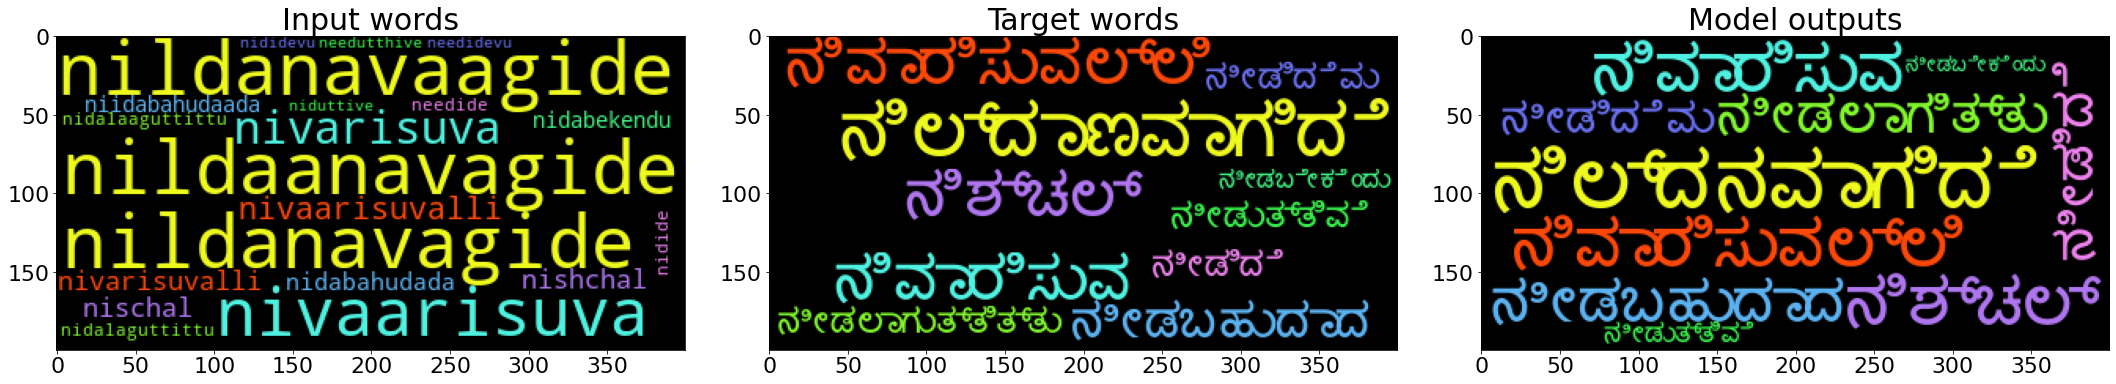

In [112]:
fig, axs = plt.subplots(1,3, figsize=(30, 15))
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
wc_in = WordCloud(random_state=1).generate_from_frequencies(input_text)
wc_out = WordCloud(font_path=font_path, random_state=1).generate_from_frequencies(output_text)
wc_tar = WordCloud(font_path=font_path, random_state=1).generate_from_frequencies(target_text)
axs[0].set_title("Input words", fontsize=30)
axs[0].imshow(wc_in.recolor(color_func=color_fn_ip))
axs[1].set_title("Target words", fontsize=30)
axs[1].imshow(wc_tar.recolor(color_func=color_fn_tr))
axs[2].set_title("Model outputs", fontsize=30)
axs[2].imshow(wc_out.recolor(color_func=color_fn_op))
plt.show()